<a href="https://www.kaggle.com/code/rogerarendse/artstyleclassifier?scriptVersionId=131618587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Art Style Classifier

The purpose of this notebook is to create an art style classifier using a pretrained neural network, which can identify and categorize art into one of three styles: Cubism, Surrealism, or Abstract Expressionism. To achieve this, we first collect and preprocess approximately 200 images per art style using DuckDuckGo image search. Next, we fine-tune the pretrained neural network to recognize these art styles. Finally, we test the model's performance on new images to evaluate its accuracy and generalization capabilities.

### Steps:
#### 1. Get and Preprocess data
   Use DuckDuckGo to search for images of art styles. Roughly 200 pictures per art style
   - Abstract Expressionism:
    A spontaneous and emotive art style characterized by non-representational forms and energetic brushwork, conveying emotions and inner experiences.
   - Cubism:
    An art style that portrays objects from multiple viewpoints, deconstructing and reassembling them in geometric forms.
   - Futurism:
   - Mathematical art:
   - Optical Illusion:
   - Surrealism:
    An artistic movement emphasizing the subconscious and dreamlike imagery, often featuring juxtaposed and illogical elements.
   
#### 2. Train, Clean & Test the Model
   Fine-tune a pretrained neural network to recognise these styles. Test the model. Clean the data to improve performance. Test the model


### Step 1: Get Data

In [2]:
# import libraries
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
# from duckduckgo_search import ddg_imagesddg
from tkinter import Image
from time import sleep
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
import os
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt
from duckduckgo_search import DDGS
from pathlib import Path

import os
from collections import defaultdict
import pandas as pd
from pathlib import Path

In [7]:
# duckduckgo search function
def search_duckduckgo_image(query, max_images=1):
    """search for image URLs using DuckDuckGo."""
    with DDGS() as ddgs:
        results = list(ddgs.images(f'{query} art photo', max_results=max_images))
    return [img['image'] for img in results] if results else None

def process_image(query, art, max_images=1, test=True):
    """process the image search, download, resize, and display/save."""
    urls = search_duckduckgo_image(query, max_images)
    if not urls:
        print("No images found.")
        return

    for i, url in enumerate(urls):
        # download image from url
        headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
            }

        try:
            response = requests.get(url, headers=headers, timeout=5)
            response.raise_for_status()  # ensure we got a valid response
            image = Image.open(BytesIO(response.content))
            image.verify()  # check if the image is valid
            image = Image.open(BytesIO(response.content))  # reopen after verification
        except (requests.exceptions.RequestException, UnidentifiedImageError) as e:
            print(f"Skipping invalid image: {e}")
            continue
    
        # resize image
        resized_image = image.resize((192, 192))

        if test:
            # display image
            print(f'{query}')
            display(resized_image)

            # saving image in sample folder
            resized_image.convert("RGB").save(os.path.join(f'images/sample/{art}', f'{query}_{i}.jpg'))


        else:
            # saving image in sample folder
            resized_image.convert("RGB").save(os.path.join(f'images/training/{art}', f'{query}_{i}.jpg'))
            print(f"Searching for {query} image {i+1} of {max_images}.")

abstract expressionism


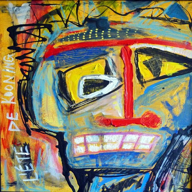

abstract expressionism


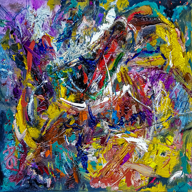

In [9]:
# testing abstract expressionism
if __name__ == "__main__":
    process_image('abstract expressionism', 'abstract expressionism', max_images=2, test=True)

cubism


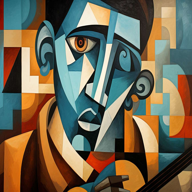

cubism


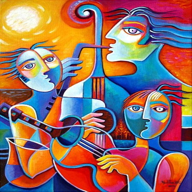

In [10]:
# testing cubism 
if __name__ == "__main__":
    process_image('cubism', 'cubism', max_images=2, test=True)

futurism


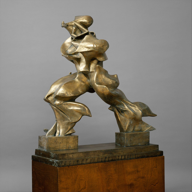

futurism


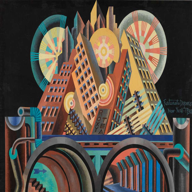

In [11]:
# testing futurism
if __name__ == "__main__":
    process_image('futurism', 'futurism', max_images=2, test=True)

mathematical


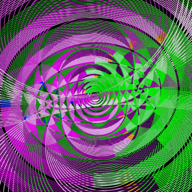

mathematical


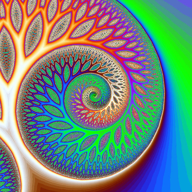

In [12]:
# testing mathematical
if __name__ == "__main__":
    process_image('mathematical', 'mathematical', max_images=2, test=True)

minimalism


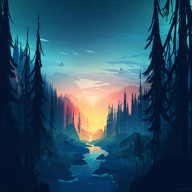

minimalism


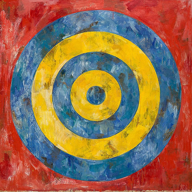

In [13]:
# minimalism
if __name__ == "__main__":
    process_image('minimalism', 'minimalism', max_images=2, test=True)

optical illusion


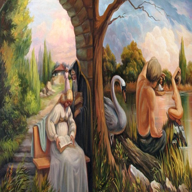

optical illusion


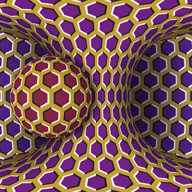

In [14]:
# testing optical illusion
if __name__ == "__main__":
    process_image('optical illusion', 'optical illusion', max_images=2, test=True)

pop


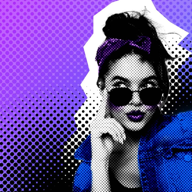

pop


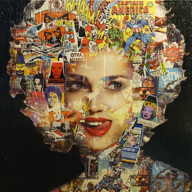

In [15]:
# testing pop art
if __name__ == "__main__":
    process_image('pop', 'pop', max_images=2, test=True)

surrealism


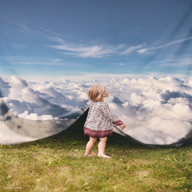

surrealism


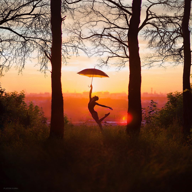

In [16]:
# testing surrealism
if __name__ == "__main__":
    process_image('surrealism', 'surrealism', max_images=2, test=True)

In [31]:
# data 
art_style_data = {
    'abstract expressionism': ['abstract expressionism'],
    'cubism': ['cubism'],
    'futurism': ['futurism'],
    'mathematical': ['mathematical'],
    'minimalism': ['minimalism'],
    'optical illusion': ['optical illusion'],
    'pop': ['pop'],
    'surrealism': ['surrealism']
}

# function to collect images
def collect_images(dict_data):
    """collect 250 images per art style in the dictionary."""
    for key, value in dict_data.items():
        for i in value:
            process_image(i, key, max_images=250, test=False)

In [32]:
# collect images
collect_images(art_style_data)

Searching for abstract expressionism image 1 of 250.
Searching for abstract expressionism image 2 of 250.
Skipping invalid image: HTTPSConnectionPool(host='get.pxhere.com', port=443): Read timed out. (read timeout=5)
Searching for abstract expressionism image 4 of 250.
Searching for abstract expressionism image 5 of 250.
Skipping invalid image: HTTPSConnectionPool(host='get.pxhere.com', port=443): Read timed out. (read timeout=5)
Searching for abstract expressionism image 7 of 250.
Searching for abstract expressionism image 8 of 250.
Skipping invalid image: 503 Server Error: No healthy IP available for the backend for url: http://media.vogue.com/r/c_1,h_4000,w_3280/2016/06/13/04-women-expressionism.jpg
Searching for abstract expressionism image 10 of 250.
Searching for abstract expressionism image 11 of 250.
Searching for abstract expressionism image 12 of 250.
Searching for abstract expressionism image 13 of 250.
Searching for abstract expressionism image 14 of 250.
Skipping invalid i

c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for minimalism image 193 of 250.
Searching for minimalism image 194 of 250.
Searching for minimalism image 195 of 250.
Searching for minimalism image 196 of 250.
Searching for minimalism image 197 of 250.
Searching for minimalism image 198 of 250.
Searching for minimalism image 199 of 250.
Searching for minimalism image 200 of 250.
Searching for minimalism image 201 of 250.
Skipping invalid image: 403 Client Error: Forbidden for url: https://coolwallpapers.me/picsup/5032214-minimalism-artist-artwork-digital-art-hd-minimalist-alone.jpg
Searching for minimalism image 203 of 250.
Searching for minimalism image 204 of 250.
Searching for minimalism image 205 of 250.
Searching for minimalism image 206 of 250.
Searching for minimalism image 207 of 250.
Searching for minimalism image 208 of 250.
Searching for minimalism image 209 of 250.
Searching for minimalism image 210 of 250.
Skipping invalid image: 404 Client Error: Not Found for url: https://www.wherebuyart.com/images/WhiteAndB

In [33]:
# function to count images per subcategory to test the distribution of images collected
def count_images_per_subcategory(data_dir, class_mapping):
    """count the number of images per subcategory in a dataset."""

    data_dir = Path(data_dir)
    counts = []

    # itterate through each class and its subcategories
    for class_name, subcategories in class_mapping.items():
        class_path = data_dir / class_name
        
        if class_path.is_dir():
            for subcategory in subcategories:
                # find all images that match the subcategory naming pattern
                subcat_images = list(class_path.glob(f"{subcategory}_*.jpg"))
                counts.append([class_name, subcategory, len(subcat_images)])

    # create a DataFrame
    df = pd.DataFrame(counts, columns=["art", "art", "count"])
    return df


In [34]:
# get the counts
df_counts = count_images_per_subcategory("images/training", art_style_data)

# view result
print(df_counts)

                      art                     art  count
0  abstract expressionism  abstract expressionism    228
1                  cubism                  cubism    242
2                futurism                futurism    244
3            mathematical            mathematical    240
4              minimalism              minimalism    224
5        optical illusion        optical illusion    242
6                     pop                     pop    238
7              surrealism              surrealism    241


## Step 2: Train the Model

In [36]:
# data splitting
import os
import random
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split

# move files into train/val folders and load data using pytorch
import shutil
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# training model
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import time

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random


In [37]:
# dictionary to hold train/val splits
train_files = []
val_files = []

# collect images by class and subcategory
subcategory_images = defaultdict(list)

# iterate over class folders (carnivore, marsupial, etc.)
for class_name in os.listdir("images/training/"):
    class_path = os.path.join("images/training/", class_name)
    
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            if image_file.endswith(".jpg"):
                subcategory = image_file.rsplit("_", 1)[0]  # extract subcategory (e.g., 'bear' from 'bear_0.jpg')
                subcategory_images[(class_name, subcategory)].append(os.path.join(class_path, image_file))

# perform a 80/20 split per subcategory
split_data = []
for (class_name, subcategory), images in subcategory_images.items():
    random.shuffle(images)  # shuffle for randomness
    train, val = train_test_split(images, test_size=0.2, random_state=42)
    
    for file in train:
        split_data.append(("train", class_name, subcategory, file))
    for file in val:
        split_data.append(("val", class_name, subcategory, file))

# convert to dataframe for verification
split_df = pd.DataFrame(split_data, columns=["set", "class", "subcategory", "file"])

# summarize the counts
summary_table = split_df.groupby(["set", "class", "subcategory"]).size().reset_index(name="count")

# display summary of train/val counts per class & subcategory
print(summary_table)


      set                   class             subcategory  count
0   train  abstract expressionism  abstract expressionism    182
1   train                  cubism                  cubism    193
2   train                futurism                futurism    195
3   train            mathematical            mathematical    192
4   train              minimalism              minimalism    179
5   train        optical illusion        optical illusion    193
6   train                     pop                     pop    190
7   train              surrealism              surrealism    192
8     val  abstract expressionism  abstract expressionism     46
9     val                  cubism                  cubism     49
10    val                futurism                futurism     49
11    val            mathematical            mathematical     48
12    val              minimalism              minimalism     45
13    val        optical illusion        optical illusion     49
14    val                

In [38]:
# move images from images/training to train and val folders under dataset
train_path = os.path.join("dataset", "train")
val_path = os.path.join("dataset", "val")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
# create train/val directories
for path in [train_path, val_path]:
    os.makedirs(path, exist_ok=True)

# move images into correct train/val directories
for _, row in split_df.iterrows():
    dataset_type, class_name, subcategory, file_path = row["set"], row["class"], row["subcategory"], row["file"]
    
    # destination path
    dest_folder = os.path.join("dataset", dataset_type, class_name)
    os.makedirs(dest_folder, exist_ok=True)
    
    # move file
    shutil.move(file_path, os.path.join(dest_folder, os.path.basename(file_path)))

print("Files successfully moved into structured dataset format.")


Files successfully moved into structured dataset format.


In [40]:
# define transforms (only resizing + normalization for now)
transform = transforms.Compose([
    transforms.Resize((192, 192)),  # resize to 192x192 (adjustable)
    transforms.ToTensor()           # convert to pytorch tensor
])

# load datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
val_dataset = datasets.ImageFolder(root=val_path, transform=transform)

# create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# verify class mappings
print("class index mapping:")
print(train_dataset.class_to_idx)
print('')
print('data summary:')
print(f"total | {len(train_dataset) + len(val_dataset)}")
print(f"train | {len(train_dataset)}")
print(f"val   | {len(val_dataset)}")

class index mapping:
{'abstract expressionism': 0, 'cubism': 1, 'futurism': 2, 'mathematical': 3, 'minimalism': 4, 'optical illusion': 5, 'pop': 6, 'surrealism': 7}

data summary:
total | 1899
train | 1516
val   | 383


In [ ]:
# ---------------------------- initialize model ----------------------------
def initialize_model(model_name, num_classes, device):
    """load a pre-trained model and modify the classification head."""
    model = getattr(models, model_name)(pretrained=True)

    if "resnet" in model_name:
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif "efficientnet" in model_name or "mobilenet" in model_name:
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)

    return model.to(device)

# ---------------------------- optimizer & loss ----------------------------
def get_optimizer_and_loss(model, lr):
    """return the loss function and optimizer."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    return criterion, optimizer

# ---------------------------- training function ----------------------------
def train_model(model_name, train_loader, num_classes, num_epochs, lr, device):
    """train a model with a given architecture, dataset, and hyperparameters."""
    
    # initialize model
    model = initialize_model(model_name, num_classes, device)
    
    # define loss function and optimizer
    criterion, optimizer = get_optimizer_and_loss(model, lr)

    # define learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

    # training loop
    model.train()
    loss_history = []
    start_time = time.time()

    for epoch in range(num_epochs):
        total_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, LR = {scheduler.get_last_lr()[0]:.6f}")
        # step the scheduler at the end of each epoch
        scheduler.step()

    training_time = time.time() - start_time
    print(f"\nTraining Complete! Time Taken: {training_time:.2f} sec\n")

    return model, loss_history, training_time

# ---------------------------- evaluation function ----------------------------
def evaluate_model(model, val_loader, device):
    """Evaluate the trained model on a validation dataset."""
    
    model.eval()
    correct, total = 0, 0
    loss_total = 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss_total += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    avg_loss = loss_total / len(val_loader)

    return accuracy, avg_loss, total, correct

def validation_output(accuracy, avg_loss, total, correct):
    # print metrics in a structured format
    print("Validation Results")
    print("-"*30)
    print(f"Total Images Tested:         {total}")
    print(f"Images Predicted Correctly:  {correct}")
    print(f"Validation Accuracy:         {accuracy:.2f}%")
    print(f"Validation Loss:             {avg_loss:.4f}")



cubism art


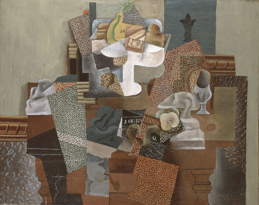

surrealism art


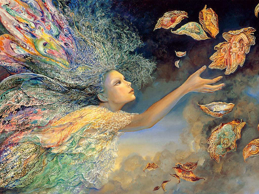

abstract expressionism art


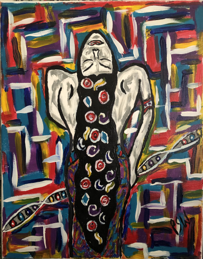

In [5]:
# view one image of various art styles  
style = 'cubism', 'surrealism', 'abstract expressionism'
for i in style:
    download_url(search_images(f'{i} art', max_images=1, test=True)[0], f'{i}.jpg', show_progress=False)
    img = Image.open(f'{i}.jpg').to_thumb(259, 259)
    display(img)

In [8]:
# build dataset 
style = 'cubism', 'surrealism', 'abstract expressionism'
path = Path('art')

for i in style:
    dest = (path/i)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=(search_images(f'{i} art', max_images=200)))

Searching for: cubism art
Searching for: surrealism art
Searching for: abstract expressionism art


In [9]:
# view number of images
print(f'Number of images: {len(get_image_files(path))}')

Number of images: 592


In [10]:
# verify images, remove and view failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f'Failed images: {len(failed)}')

Failed images: 19


### Step 2: Train, Clean & Test the Model

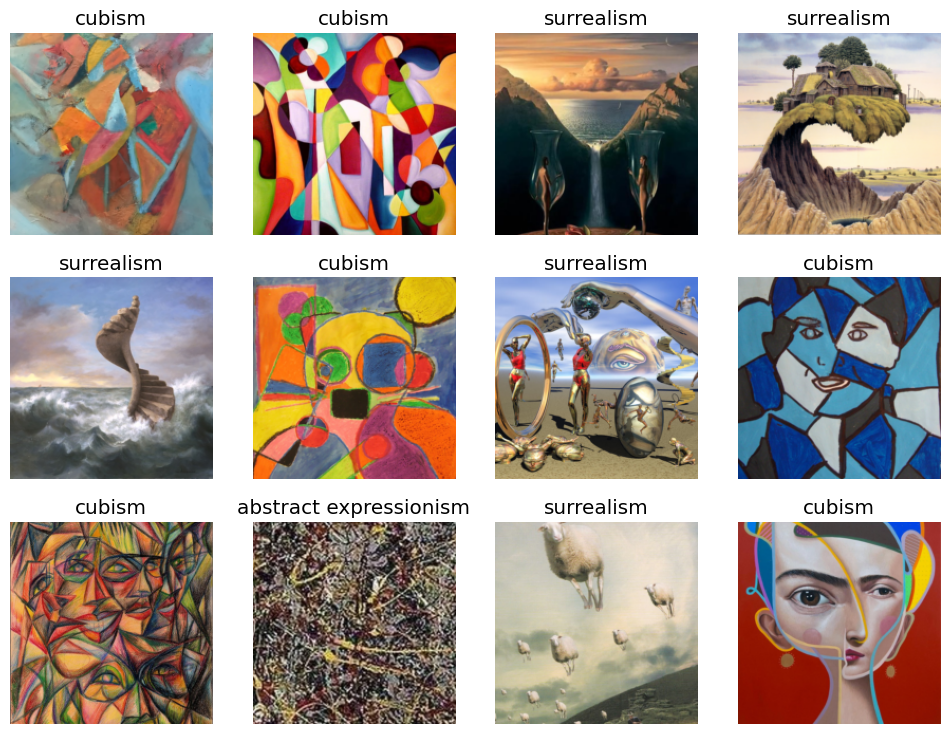

In [11]:
# create training and validation dataset
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192)]
).dataloaders(path, bs=32)

data.show_batch(max_n=12, nrows=3)


In [12]:
# train model before cleaning
learn = vision_learner(data, resnet18, metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 151MB/s] 


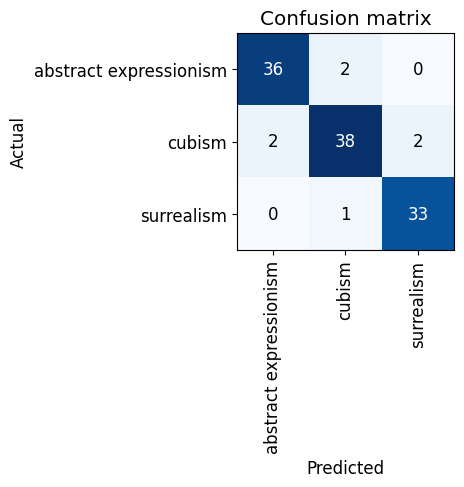

In [13]:
# use confusion matrix to view model performance 
# this will give an idea of what data needs cleaning
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

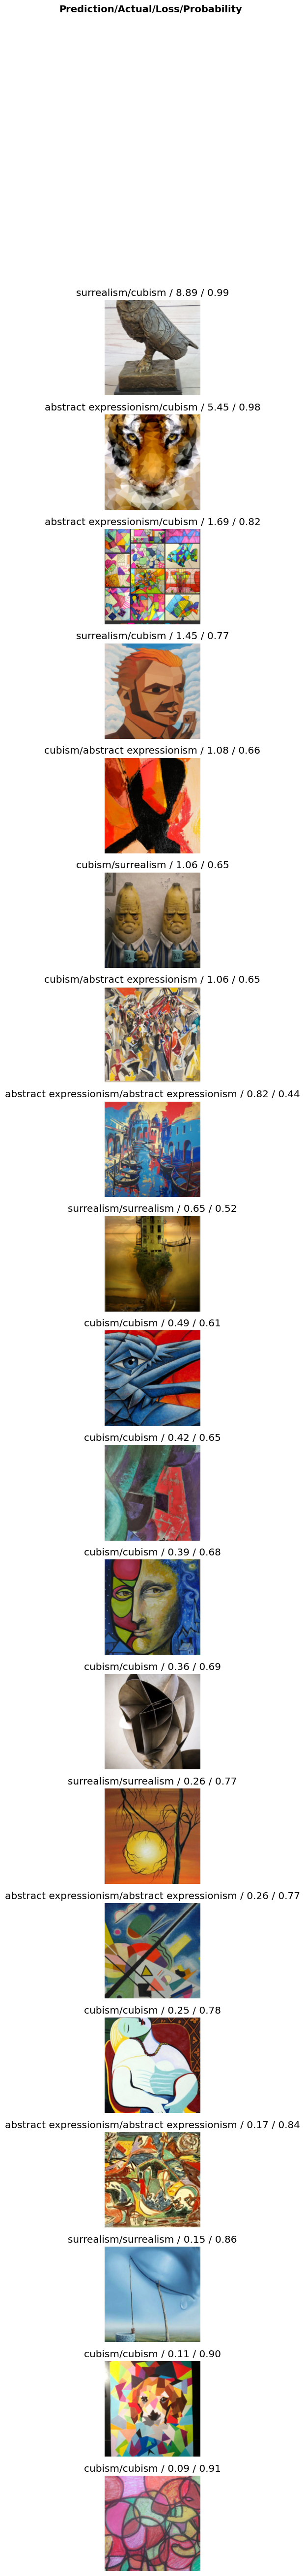

In [14]:
# plot top losses - prediction/actual/loss/probability
interp.plot_top_losses(20, nrows=20)

In [ ]:
# go through data for cleaning
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Step 3: Create pickle file

In [15]:
# create a pickle file
from IPython.display import FileLink

learn.export('model.pkl')
FileLink('model.pkl')

/kaggle/working/model.pkl